# <h1><center> HW 8 AMATH 342 </center></h1>

Working together is absolutely encouraged.

Turn in a write up with your solutions including discussion, plots, and code. Full points require that this is legible, understandably explained, and reasonably organized. 

If you have difficulty with the assignment, please $\textbf{come to office hours and get help!}$ 

$\textbf{Problem 1: Building a Neural Net}$

Create a two layer neural network which can solve the XOR problem. To receive full credit, you need do the following
* Write down the weights, theta's and the g's for each of your 3 perceptrons. (A total of 9 numbers and 3 functions, although it would be easiest to just reuse the same g)
* Just for the three points (0,0), (1,0), (1, 1), show the computations that show that your network really outputs [0, 1, 0] for the three data points. That is, write the exact computations to show how the initial x1 and x2's get transformed to a binary label.

<br><br><br><br><br><br>







$\textbf{Problem 2: Training a Perceptron}$ 

Train a perceptron using $\textit{gradient descent}$ to classify the following data. 

The data measure septal length (column 1) and petal length (column 2) of two types of flowers. These data are stored in the variable '$\textbf{X}$'. Your model should take $\textit{septal length}$ and $\textit{petal length}$ as inputs. Your model should output 1 if the flower is a setosa or -1 if
it is a versicolor (two types of Iris flower). These data are in $\textbf{y}$. Both have been loaded in the cell below for you. There are 50 samples of each flower (so $\textbf{X}$ is 100 $\times$ 2). Here are some steps to help guide you.


A) Plot the data. Color code the data so that the  setosa flowers are one color and versicolor flowers are a different color. Can a perceptron be used for these data? Why? 

B) Write a loop which implements the gradient descent algorithm. <br>
$\hspace{4mm}$    a) Initialize your weights and bias to random values (say -1 $\leq$ w $\leq$ 1). <br>
$\hspace{4mm}$    b) Iterate through all the data points in $\textbf{X}$ and update the weights and bias for EACH data point. 

C) What is the error rate of your perceptron after 10 steps? 30? (You can also do number of misclassifications instead of error rate)

D) Sometimes, we will train over many "epochs." That is, we loop over all the data several times and just continue using gradient descent. What is the error rate after training over two epochs? 

E) How does this error rate change as a function of learning rate? Plot the error as a function of the learning rate for 3-5 different learning rates (hint: try logspace to choose learning rates between 0 and 1). Train over at least one epoch on the data. 



<br><br><br><br>
HINTS: <br><br>
-Use a learning rate between 0 and 1. <br> <br>
-For your perceptron, you can use the following for updating on each step (this is similar to the learning rule we saw in class):

$\Delta w = \eta(t_{i}-o_{i}) * x_{i}$ for the weights and <br>
$\Delta \theta = \eta(t_i-o_i)$ for the bias, where $o_{i}$ is your output, $t_{i}$ is your target output, $\eta$ is your learning rate, and $x_{i}$ is your input. <br><br><br>
-Remember to update both weights: $w_1$ and $w_2$ in your loop.  

[5.1 1.4]


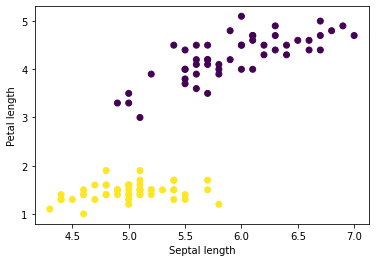

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%% Load data 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

plt.figure()
plt.xlabel('Septal length')
plt.ylabel('Petal length')
plt.scatter(X[:,0], X[:,1], c= y)
print(X[0,:])


def Perceptron(weights,inputs,bias):   #You can use this to return the output of the Perceptron at each step! Hint: use np.sign (1/-1) instead of 1/0
    
    return np.sign(np.dot(weights,inputs) - bias)

A) A single layer perceptron can be used to classify this data because it is clearly linearly separable; i.e. a clear line can be drawn that can distinguish between setosa and versicolor flowers.

In [240]:
#Implementing gradient descent 
import random

random.seed(5)  #I found this led to a convergent solution for w1, w2, bias
wts = np.empty(2)
wts[0] = random.randrange(-1,1)
wts[1] = -1
bias= random.randrange(-1,1)

print("Initial bias: ", bias)
print("Initial weights: ", wts)

lr = 0.01

epochs = 2
curr_epoch = 0
while curr_epoch < epochs:
    num_correct = 0
    for i in range(X.shape[0]):
        inp = X[i,:]
        y_tilda = Perceptron(wts, inp, bias)

        #get model output, calculate gradient, and update weights
        wts[0] += lr*inp[0]*(y[i] - y_tilda)
        wts[1] += lr*inp[1]*(y[i] - y_tilda)
        bias += lr*(y[i]-y_tilda)
        
        if (y[i] == y_tilda):
            num_correct += 1
        if (i == 9 and curr_epoch == 0):
            error_10 = 1 - num_correct / 10
        if (i == 29 and curr_epoch == 0):
            error_30 = 1 - num_correct / 30
            
    error_rate_total = 1 - num_correct/100
    print('Error rate, ', curr_epoch + 1, ' epochs of training: ', error_rate_total)
    curr_epoch += 1

    
print('Error rate, first epoch after 10 steps: ', error_10)
print('Error rate, first epoch after 30 steps: ', error_30)



Initial bias:  0
Initial weights:  [ 0. -1.]
Error rate,  1  epochs of training:  0.040000000000000036
Error rate,  2  epochs of training:  0.0
Error rate, first epoch after 10 steps:  0.4
Error rate, first epoch after 30 steps:  0.1333333333333333


#### Answers to C and D:

Initial bias:  0

Initial weights:  [ 0. -1.]

Error rate,  1  epochs of training:  0.040000000000000036

Error rate,  2  epochs of training:  0.0

Error rate, first epoch after 10 steps:  0.4

Error rate, first epoch after 30 steps:  0.1333333333333333

Initial bias:  0
Initial weights:  [ 0. -1.]
[0.0001, 0.001, 0.01, 0.1, 1]
Error rate,  1  epochs of training:  0.5
Learning rate:  0.0001
Error rate,  1  epochs of training:  0.28
Learning rate:  0.001
Error rate,  1  epochs of training:  0.010000000000000009
Learning rate:  0.01
Error rate,  1  epochs of training:  0.0
Learning rate:  0.1
Error rate,  1  epochs of training:  0.0
Learning rate:  1
[0.5, 0.28, 0.010000000000000009, 0.0, 0.0]


Text(0, 0.5, 'Error Rate')

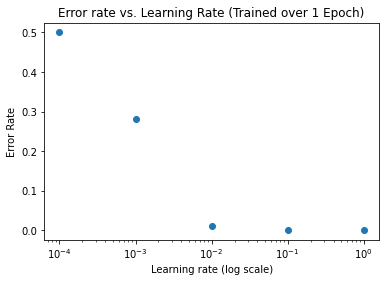

In [260]:
#Implementing gradient descent 
import random

random.seed(5)  #I found this led to a convergent solution for w1, w2, bias
wts = np.empty(2)
wts[0] = random.randrange(-1,1)
wts[1] = -1
bias= random.randrange(-1,1)

print("Initial bias: ", bias)
print("Initial weights: ", wts)

l_rates = [0.0001, 0.001, 0.01, 0.1, 1]
error_rate_list = []
print(l_rates)


for lr in l_rates:
    epochs = 1
    curr_epoch = 0
    while curr_epoch < epochs:
        num_correct = 0
        for i in range(X.shape[0]):
            inp = X[i,:]
            y_tilda = Perceptron(wts, inp, bias)

            #get model output, calculate gradient, and update weights
            wts[0] += lr*inp[0]*(y[i] - y_tilda)
            wts[1] += lr*inp[1]*(y[i] - y_tilda)
            bias += lr*(y[i]-y_tilda)

            if (y[i] == y_tilda):
                num_correct += 1

        error_rate_total = 1 - num_correct/100
        print('Error rate, ', curr_epoch + 1, ' epochs of training: ', error_rate_total)
        print('Learning rate: ', lr)
        
        error_rate_list.append(error_rate_total)
        curr_epoch += 1

print(error_rate_list)
plt.figure()
plt.scatter(l_rates,error_rate_list)
plt.xscale('log')
plt.title('Error rate vs. Learning Rate (Trained over 1 Epoch)')
plt.xlabel('Learning rate (log scale)')
plt.ylabel('Error Rate')



We can see clearly that as learning rate goes up, error rate goes down when training over 1 epoch. This is because with a higher learning rate, the 'steps' are larger in gradient descent, so we converge at a solution for the correct weights and biases earlier in the training phase. When the learning rate is smaller, the gradient descent steps are smaller and hence more precise, but it takes longer (more epochs or more training data) to converge to the solution for the correct weights and biases. 